<a href="https://colab.research.google.com/github/elliot12-l/Unidad-03-B-splines-c-bicos/blob/main/Tarea_07_splines_c%C3%BAbicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import sympy as sym
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """
    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between contiguous xs

    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = (3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1]))

    l = [1] + [0] * n
    u = [0] * n
    z = [0] * (n + 1)

    for i in range(1, n):
        l[i] = 2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]
        u[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    l[n] = 1
    z[n] = 0
    c = [0] * (n + 1)
    b = [0] * n
    d = [0] * n
    a = [ys[i] for i in range(n)]

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b[j] = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])
        a[j] = ys[j]
        S_j = a[j] + b[j] * (x - xs[j]) + c[j] * (x - xs[j])**2 + d[j] * (x - xs[j])**3
        splines.append(S_j)

    splines.reverse()
    return splines



## Ejercicio 4

In [21]:
xs = [0, 1, 2]
ys = [1, 5, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

-1.5*x**3 + 5.5*x + 1

1.0*x + 1.5*(x - 1)**3 - 4.5*(x - 1)**2 + 4.0

______


-1.5*x**3 + 5.5*x + 1

1.5*x**3 - 9.0*x**2 + 14.5*x - 2.0

## Ejercicio 5

In [ ]:
xs = [0, 1, 2, 3]
ys = [-1 ,1, 5, 2]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1.0*x**3 + 1.0*x - 1

4.0*x - 3.0*(x - 1)**3 + 3.0*(x - 1)**2 - 3.0

1.0*x + 2.0*(x - 2)**3 - 6.0*(x - 2)**2 + 3.0

______


1.0*x**3 + 1.0*x - 1

-3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0

2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0

# Frontera condicionada

In [11]:
import sympy as sym
from IPython.display import display


# ###################################################################
def cubic_spline_clamped(
    xs: list[float], ys: list[float], d0: float, dn: float
) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated
    - d0, dn: derivatives at the first and last points

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1  # number of splines
    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    alpha = [0] * (n + 1)  # prealloc
    alpha[0] = 3 / h[0] * (ys[1] - ys[0]) - 3 * d0
    alpha[-1] = 3 * dn - 3 / h[n - 1] * (ys[n] - ys[n - 1])

    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [2 * h[0]]
    u = [0.5]
    z = [alpha[0] / l[0]]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(h[n - 1] * (2 - u[n - 1]))
    z.append((alpha[n] - h[n - 1] * z[n - 1]) / l[n])
    c = [0] * (n + 1)  # prealloc
    c[-1] = z[-1]

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3

        splines.append(S)
    splines.reverse()
    return splines

In [23]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

# Función para evaluar las funciones spline en un rango de valores x
def evaluate_splines(splines, xs):
    eval_splines = [sym.lambdify('x', spline, 'numpy') for spline in splines]
    ys = [eval_spline(xs) for eval_spline in eval_splines]
    return ys

# Función principal para graficar
def grap(xs, ys, d0, dn):
    xs = xs
    ys = ys
    d0=d0
    dn=dn

    splines = cubic_spline_clamped(xs, ys, d0, dn)
    # Generar puntos x para evaluar las funciones
    x_range = np.linspace(min(xs), max(xs), 500)

    # Evaluar las funciones spline en el rango x_range
    y_values = evaluate_splines(splines, x_range)

    # Graficar las funciones
    plt.figure(figsize=(8, 6))
    for i in range(len(xs) - 1):
        plt.plot(x_range[(x_range >= xs[i]) & (x_range <= xs[i+1])],
                    y_values[i][(x_range >= xs[i]) & (x_range <= xs[i+1])],
                    label=f'Segment {i+1}')

    plt.scatter(xs, ys, color='red', label='Data Points')
    plt.title('Cubic Spline Interpolation with Segments')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

## Ejercicio 1

In [31]:
xs = [0,1,2]
ys = [1,5,3]

splines = cubic_spline(xs, ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

-1.5*x**3 + 5.5*x + 1

1.0*x + 1.5*(x - 1)**3 - 4.5*(x - 1)**2 + 4.0

______


-1.5*x**3 + 5.5*x + 1

1.5*x**3 - 9.0*x**2 + 14.5*x - 2.0

## Ejercicio 2

In [28]:
xs = [-1,1]
ys = [1,3]
d0=1
dn=2

splines = cubic_spline_clamped(xs, ys, d0, dn)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

0 1 1.0 -0.5 0.25


1.0*x + 0.25*(x + 1)**3 - 0.5*(x + 1)**2 + 2.0

______


0.25*x**3 + 0.25*x**2 + 0.75*x + 1.75

## Ejercicio 6.1

7 6.7 -0.3381314976116886 -0.07593425119415571 0.0057417813992694635
6 7.1 0.04846024164091059 -0.052929661890044014 -0.0025560654782346335
5 6.6 0.5472201929380908 -0.19645031375854607 0.023920108644750342
4 5.7 1.4091093003652708 -0.665438793668634 0.15632949330336265
3 4.2 1.0163426056008245 1.0582054884330803 -0.5745480940339047
2 3.9 -0.07447972276856785 0.03261683993631198 0.3418628828322561
1 3.7 0.4468099653460711 -0.20638006930785827 0.02655521213824114
0 3 1.0 -0.3468099653460706 0.046809965346070785


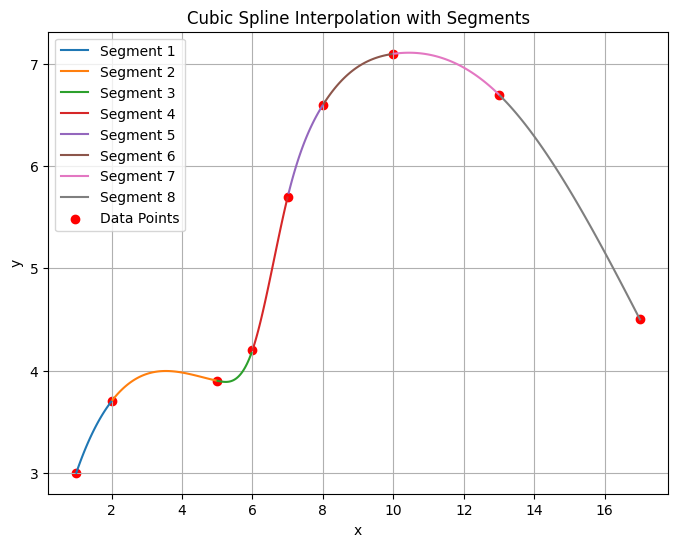

In [15]:
xs = [1,2,5,6,7,8,10,13,17]
ys = [3,3.7,3.9,4.2,5.7,6.6,7.1,6.7,4.5]
d0=1
dn=-0.67
grap(xs, ys, d0, dn)

## Ejercicio 6.2

5 5.2 -0.4011781849199465 0.1258152222202451 -2.568002126658778
4 5.8 0.1539868142803838 -0.4033977218204103 0.08820215734010924
3 5.6 -0.11137135038117751 0.6687558864819717 -0.35738453610079396
2 6.1 -0.6085014127556733 -0.17162582410747595 0.2801272368631492
1 7 -0.19787464681108174 0.03475023545927881 -0.022930673285194974
0 4.5 3.0 -1.1007084510629728 0.12616207628025017


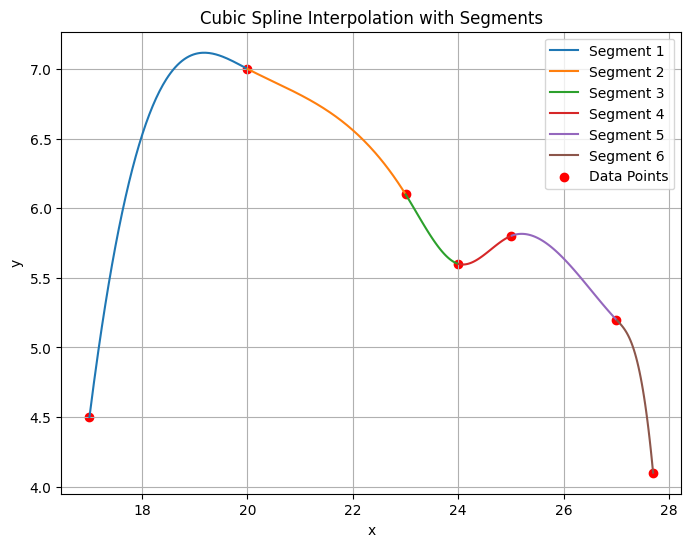

In [16]:
xs = [17,20,23,24,25,27,27.7]
ys = [4.5,7,6.1,5.6,5.8,5.2,4.1]
d0=3
dn=-4
grap(xs, ys, d0, dn)

## Ejercicio 6.3

2 4.1 -0.7653465346534649 -0.26930693069306927 -0.06534653465346556
1 4.3 0.6613861386138599 -1.1574257425742556 0.2960396039603954
0 4.1 0.3299999999999999 2.2620462046204524 -3.799413274660778


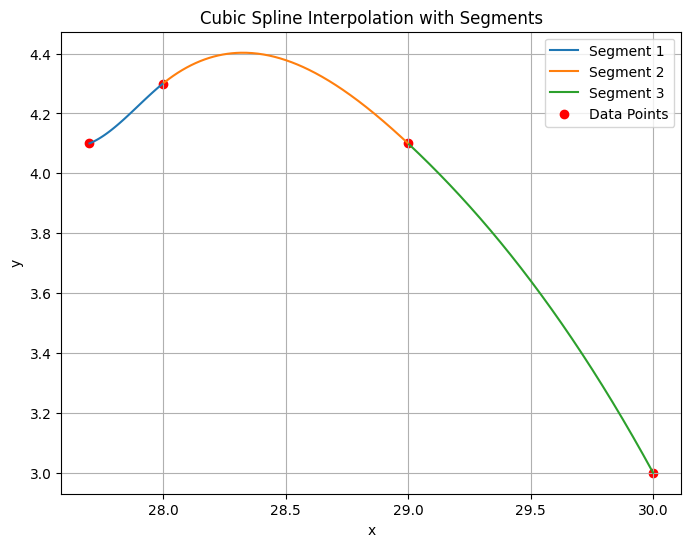

In [17]:
xs = [27.7,28,29,30]
ys = [4.1,4.3,4.1,3]
d0=0.33
dn=-1.5
grap(xs, ys, d0, dn)